In [1]:
import pickle
import seaborn as sns
with open("./Data/cp_corpus_4G.txt", "rb") as fp:   # CP: Context Preserving
    corpus_4G = pickle.load(fp)
    
with open("./Data/cp_corpus_5G.txt", "rb") as fp:   # CP: Context Preserving
    corpus_5G = pickle.load(fp)
 
    
SEP_IDX_4G = 720 #Index where 4G Security specification ends
SEP_IDX_5G = 1233 #Index where 5G Security specification ends
TYPE = '4G'

In [2]:
if TYPE == '4G':
    sentences = corpus_4G
    SEP_IDX = SEP_IDX_4G
elif TYPE == '5G':
    sentences = corpus_5G
    SEP_IDX = SEP_IDX_5G
else:
    print("ERROR")

In [3]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample list of sentences
# sentences = [
#     "This is the first sentence.",
#     "Another sentence goes here.",
#     "The third sentence is different.",
#     "This is the last sentence.",
#     "The UE is exceptional"
# ]

# Preprocess the sentences and create TaggedDocument objects
tagged_data = [TaggedDocument(words=sentence.lower().split(), tags=[str(i)]) for i, sentence in enumerate(sentences)]

# Doc2Vec model training
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Get embeddings for the sentences
embeddings = [model.infer_vector(doc.words) for doc in tagged_data]

# Calculate cosine similarity matrix
cosine_sim_matrix_doc2vec = cosine_similarity(embeddings)

# Print the similarity matrix
#print("Cosine Similarity Matrix:")
#print(cosine_sim_matrix_doc2vec)

/usr/local/anaconda3/lib/python3.9/site-packages/botocore/httpsession.py:17: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext
/usr/local/anaconda3/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Sample list of sentences
# sentences = [
#     "This is the first sentence.",
#     "Another sentence goes here.",
#     "The third sentence is different.",
#     "This is the last sentence.",
#     "The UE is exceptional"
# ]

# Load the Universal Sentence Encoder (USE)
model_name = "sentence-transformers/paraphrase-mpnet-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenize and get embeddings for the sentences
tokenized_sentences = [tokenizer.encode(sentence, padding='max_length', truncation=True) for sentence in sentences]
input_ids = torch.tensor(tokenized_sentences, dtype=torch.long).to(device)

# Get embeddings for all sentences in batches
batch_size = 32
embeddings = []
with torch.no_grad():
    for i in range(0, len(input_ids), batch_size):
        batch_inputs = input_ids[i:i+batch_size]
        outputs = model(input_ids=batch_inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0].cpu().numpy()
        embeddings.append(batch_embeddings)

# Concatenate embeddings from all batches
embeddings = np.concatenate(embeddings, axis=0)


# Calculate cosine similarity matrix
cosine_sim_matrix_use = cosine_similarity(embeddings)

# Print the similarity matrix
#print("Cosine Similarity Matrix:")
#print(cosine_sim_matrix_use)

In [5]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Sample list of sentences
# sentences = [
#     "This is the first sentence.",
#     "Another sentence goes here.",
#     "The third sentence is different.",
#     "This is the last sentence.",
# ]

# Load the Sentence-BERT model
model_name = "sentence-transformers/distilbert-base-nli-stsb-mean-tokens"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenize and get embeddings for the sentences
tokenized_sentences = [tokenizer.encode(sentence, padding='max_length', truncation=True) for sentence in sentences]
input_ids = torch.tensor(tokenized_sentences, dtype=torch.long).to(device)

# Get embeddings for all sentences in batches
batch_size = 32
embeddings = []
with torch.no_grad():
    for i in range(0, len(input_ids), batch_size):
        batch_inputs = input_ids[i:i+batch_size]
        outputs = model(input_ids=batch_inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0].cpu().numpy()
        embeddings.append(batch_embeddings)

# Concatenate embeddings from all batches
embeddings = np.concatenate(embeddings, axis=0)

# Calculate cosine similarity matrix
cosine_sim_matrix_sbert = cosine_similarity(embeddings)

# Print the similarity matrix
#print("Cosine Similarity Matrix:")
#print(cosine_sim_matrix_sbert)

In [6]:
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample list of sentences
# sentences = [
#     "This is the first sentence.",
#     "Another sentence goes here.",
#     "The third sentence is different.",
#     "This is the last sentence.",
# ]

# Tokenize the sentences
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

# Word2Vec model training
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Get embeddings for the sentences
embeddings = np.array([np.mean([model.wv[word] for word in sentence], axis=0) for sentence in tokenized_sentences])

# Calculate cosine similarity matrix
cosine_sim_matrix_word2vec = cosine_similarity(embeddings)

# Print the similarity matrix
#print("Cosine Similarity Matrix:")
#print(cosine_sim_matrix_word2vec)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(sentences)                                                                                                                                                                                                                       
cosine_sim_matrix_tfidf = tfidf * tfidf.T
#print("Cosine Similarity Matrix:")
#print(cosine_sim_matrix_tfidf)

/usr/local/anaconda3/lib/python3.9/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


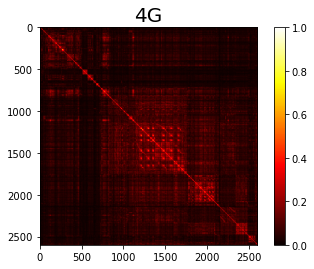

In [8]:
import matplotlib.pyplot as plt
plt.imshow(cosine_sim_matrix_tfidf.toarray(), cmap='hot')
plt.colorbar()
plt.title(f"{TYPE}",fontsize = 20)
plt.savefig(f"heatmap_{TYPE}.pdf", dpi = 300)

In [9]:
sbert = cosine_sim_matrix_sbert.flatten()
doc2vec = cosine_sim_matrix_doc2vec.flatten()
use = cosine_sim_matrix_use.flatten()
word2vec = cosine_sim_matrix_word2vec.flatten()

In [10]:
tfidf = cosine_sim_matrix_tfidf.toarray().flatten()

In [11]:
import pandas as pd
flag = []
for i in range(cosine_sim_matrix_sbert.shape[0]):
    for j in range(cosine_sim_matrix_sbert.shape[1]):
        if i<= SEP_IDX and j<= SEP_IDX:
            flag.append("Security") #only security
        elif (i<= SEP_IDX and j > SEP_IDX) or (i > SEP_IDX and j <= SEP_IDX):
            flag.append("Inter-Document") #mixed
        else:
            flag.append("NAS")

In [12]:
df = pd.DataFrame(list(zip(sbert, doc2vec, use, word2vec, tfidf, flag)),
               columns =['sbert', 'doc2vec', 'use', 'word2vec', 'tfidf', 'source'])

In [ ]:
df

In [ ]:
df.to_csv(f'tokenizer comparison result_{TYPE}.csv', index=False)

In [ ]:

#sns.stripplot()

In [ ]:
tips = sns.load_dataset("tips")
tips


# No need to run the previous cells. The datasets have been saved in corresponding csv files

In [ ]:
df = pd.read_csv(f'tokenizer comparison result_{TYPE}.csv', sep = ',')
df

In [13]:
df2 = df.sample(frac = 0.008)

In [14]:
import matplotlib.pyplot as plt
long_df = df2.melt(id_vars=['source'], var_name='Embeddings', value_name='Sim_Score')


In [15]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

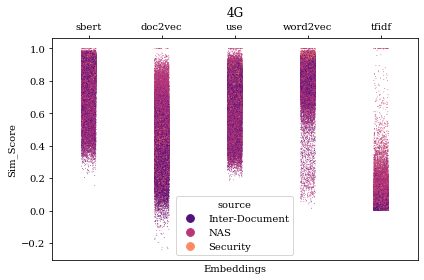

In [16]:

#sns.boxenplot(x=f'Embeddings', y='Sim_Score', data=long_df, palette='rocket',linewidth=0.1)
ax = sns.stripplot(data=long_df, x=f'Embeddings', y='Sim_Score', hue='source', size = 0.8, palette='magma')

ax.set(title=f'{TYPE}')
ax.xaxis.tick_top()
plt.tight_layout()
#plt.show()
plt.savefig(f"{TYPE}_embedding_times.png", dpi = 300)

In [ ]:
cosine_sim_matrix_sbert.shape


In [ ]:
sns.stripplot(data = df.drop("source",axis = 1))